In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.shape

(400, 11)

In [5]:
sales=pd.cut(df.Sales, bins=2, labels=np.arange(2), right=False)

In [6]:
df.Sales.value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

In [7]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 

In [8]:
df['Urban']= label_encoder.fit_transform(df['Urban']) 

In [9]:
df['US']= label_encoder.fit_transform(df['US']) 

In [10]:
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1
399,9.71,134,37,0,27,120,1,49,16,1,1


In [11]:
x=df.iloc[:,1:]
y=sales

In [12]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [13]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: category
Categories (2, int64): [0 < 1]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

C-5.0

In [15]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

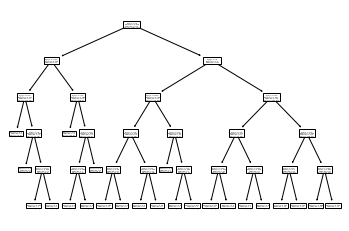

In [16]:
tree.plot_tree(model);

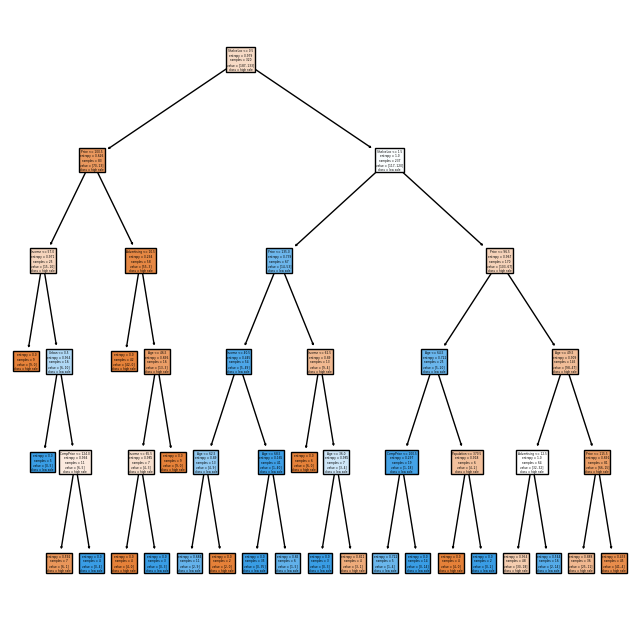

In [17]:
fn=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"]
cn = ['high sale','low sale']
fig,axes= plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=100)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True);

In [18]:
model.feature_importances_

array([0.04775048, 0.14189458, 0.08314607, 0.02977881, 0.23665014,
       0.25628257, 0.18105917, 0.        , 0.02343818, 0.        ])

In [19]:
fn=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"]
feature= pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature

ShelveLoc      0.256283
Price          0.236650
Age            0.181059
Income         0.141895
Advertising    0.083146
CompPrice      0.047750
Population     0.029779
Urban          0.023438
US             0.000000
Education      0.000000
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

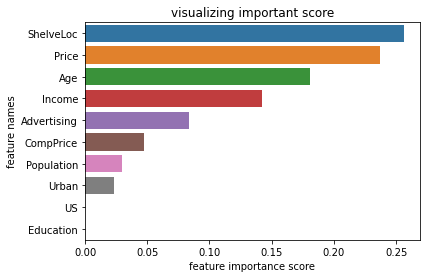

In [20]:
import seaborn as sns
sns.barplot(x=feature,y=feature.index)
plt.xlabel("feature importance score")
plt.ylabel("feature names")
plt.title("visualizing important score")
plt.show

Looking at the graph, we can say Price is the main feature causing high sales

In [21]:
preds= model.predict(x_test)
pd.Series(preds).value_counts()

0    54
1    26
dtype: int64

In [22]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales,,
0,45,9
1,9,17


In [23]:
np.mean(preds==y_test)

0.775

In [24]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        54
           1       0.65      0.65      0.65        26

    accuracy                           0.78        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.78      0.78      0.78        80



CART

In [25]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [26]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [27]:
pred=model_gini.predict(x_test)

In [28]:
np.mean(pred==y_test)

0.8

Decision Tree Regression Example

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
array = df.values

In [31]:
x= array[:,1:]
y= sales

In [32]:
sales

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: category
Categories (2, int64): [0 < 1]

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [34]:
model_reg= DecisionTreeRegressor()
model_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
model_reg.score(x_test,y_test)

0.0313390313390316